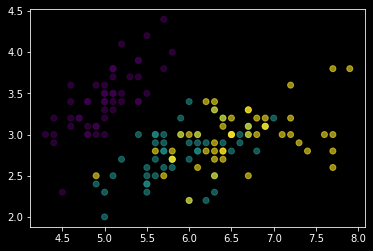

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y= iris.target

plt.scatter(X[:,0],X[:,1],c=y, alpha=0.6)

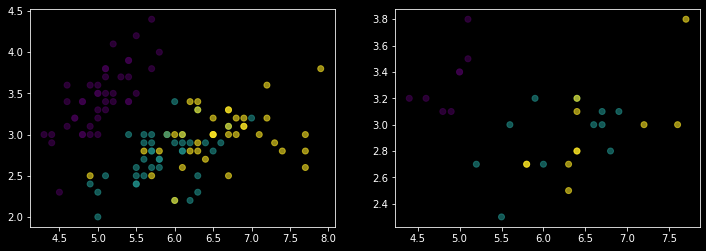

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, alpha=0.6)
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test, alpha=0.6)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(n_neighbors=11),X_train,y_train,cv=5,scoring='accuracy').mean()

0.9833333333333334

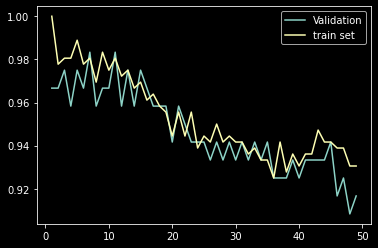

In [60]:
from sklearn.model_selection import validation_curve

k = np.arange(1,50)
model = KNeighborsClassifier()

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors',param_range=k , cv=4)

plt.plot(k,val_score.mean(axis=1),label='Validation')
plt.plot(k,train_score.mean(axis=1),label='train set')
plt.legend()

In [90]:
from sklearn.model_selection import GridSearchCV
param = { 'n_neighbors':np.arange(1,20), 'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(),param_grid=param,cv=5)
grid.fit(X_train,y_train)

model_best = grid.best_estimator_
model_best.score(X_test,y_test)


0.9

[[ 8  0  0]
 [ 0  8  3]
 [ 0  0 11]]


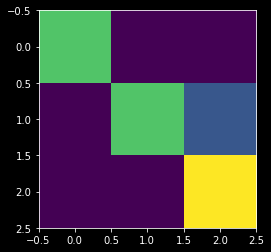

In [89]:
from sklearn.metrics import confusion_matrix

pred = confusion_matrix(y_test, model_best.predict(X_test))

print(pred)

plt.imshow(pred)

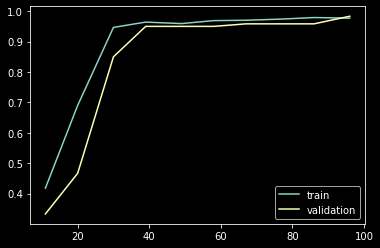

In [91]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model_best,X_train,y_train,train_sizes=np.linspace(0.12,1.0,10),cv=5)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()